<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# Support vector machines

El método de Support vector machines está basado en generar la mejor partición de un espacio mediante un hiperplano, por ende, este método sólo sería útil para clasificar problemas linealmente separables. Para solucionar esta desventaja se puede modificar el espacio pata transformar las tareas en tareas linealmente separables.

In [1]:
import sklearn.datasets
import sklearn.svm # Support vector machines
import sklearn.metrics
import sklearn.gaussian_process # Kernel de transformación del espacio
import sklearn.preprocessing
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import scipy

Para demostrar el funcionamiento base de las Support Vector Machines generaremos un conjunto de datos sintético linealmente separable.

In [2]:
blobs_features, blobs_label = sklearn.datasets.make_blobs(
    n_samples = 200,
    n_features = 2,
    centers=2,
    cluster_std = 5,
    random_state=11
)

Separamos el conjunto en subconjuntos de entrenamiento y prueba.

In [3]:
(
    blobs_features_train,
    blobs_features_test,
    blobs_label_train,
    blobs_label_test
) = sklearn.model_selection.train_test_split(
    blobs_features,
    blobs_label,
    test_size=0.33,
    random_state=11
)

Visualizamos el conjunto de datos sintético.

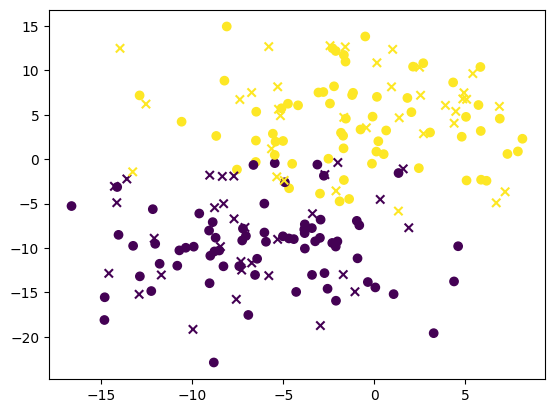

In [4]:
plt.scatter(
    x = blobs_features_train[:,0],
    y = blobs_features_train[:,1],
    c = blobs_label_train,
    label = "traint"
)
plt.scatter(
    x = blobs_features_test[:,0],
    y = blobs_features_test[:,1],
    c = blobs_label_test,
    marker = "x",
    label = "test"
)

## Kernel lineal

Evaluaremos el desempeño de este método con un kernel linea, lo que es lo mismo que utilizar directamente SVM sin modificar el espacio.

In [5]:
svm_linear = sklearn.svm.SVC(kernel="linear")
svm_linear.fit(blobs_features_train, blobs_label_train)

SVC(kernel='linear')

Al entrenar nuestra SVM con kernel lineal ajustaremos los coeficientes asociados a la hiperplano que separa las clases.

In [6]:
svm_linear.coef_

array([[0.10097214, 0.31220573]])

In [7]:
svm_linear.intercept_

array([1.40429114])

La función de decisión que utilizamos para predecir la clase de un punto es la siguiente:


$$
c = W \cdot x + b
$$

Donde $W$ son los coeficientes ajustados y $b$ es el intercepto

In [8]:
np.dot(
    blobs_features_test,
    svm_linear.coef_[0]
) + svm_linear.intercept_

array([ 1.19829619,  0.03213911,  3.53524277,  0.58821154,  2.75314431,
        3.11048161, -2.52024034,  5.14610692,  4.95782002,  1.08422087,
       -5.58098065, -0.99596509,  0.15860148,  2.70308853,  3.41169862,
        2.41118597,  4.01356035, -1.55281051, -2.59591921,  5.36433186,
       -4.28534379, -4.07978834,  0.54768656,  4.88432169,  2.99720841,
        0.98487866, -0.99183193,  4.01907412,  3.06464116, -3.22770938,
       -1.94818743,  4.23492146,  4.80463633, -0.07123254,  2.07256158,
       -1.18612123, -1.47030098,  1.22451357, -0.66432139, -3.27232736,
       -0.38165972, -4.74061081, -0.28477351, -3.36011109, -2.92965653,
        2.46380377,  3.68952661,  0.24258159,  2.5717767 , -2.92103308,
        4.04121248, -0.85306928,  2.62634754, -3.8463254 ,  0.07912577,
        3.88764865, -4.64849073, -2.82160889, -0.04436051,  3.90640312,
        3.95305212, -0.81310144,  5.18920144, -1.71192526,  0.02330571,
        4.77296815])

Para obtener la clase asociada a cada resultado debemos considerar sólo el signo.

In [9]:
svm_linear_predictions = ((np.dot(
    blobs_features_test,
    svm_linear.coef_[0]
) + svm_linear.intercept_) > 0).astype(int)
svm_linear_predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

El rendimiento de este modelo es el siguiente:

In [10]:
print(sklearn.metrics.classification_report(blobs_label_test,svm_linear_predictions))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.87      0.94      0.90        35

    accuracy                           0.89        66
   macro avg       0.90      0.89      0.89        66
weighted avg       0.90      0.89      0.89        66



El hiperplano separatriz lo podemos calcular desde los parámetros y el intercepto de la siguiente manera

In [11]:
def linear_function(x, m = -1 * svm_linear.coef_[0][0] / svm_linear.coef_[0][1] , c = svm_linear.intercept_[0] / svm_linear.coef_[0][1]):
    return m * x - c

Calculamos el hiperplano separatriz

In [12]:
decision_boundary_line_x = np.array([blobs_features_train[:,0].min(), blobs_features_train[:,0].max()])
decision_boundary_line_y = [linear_function(x) for x in decision_boundary_line_x]

In [13]:
decision_boundary_line_y

[0.8836303376569807, -7.133404274104089]

Visualizamos el hiperplano separatriz

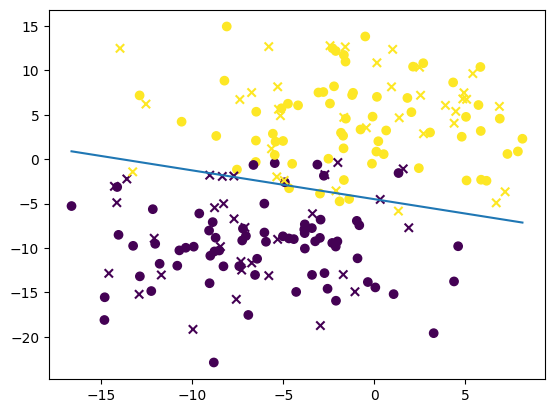

In [14]:
plt.scatter(
    x = blobs_features_train[:,0],
    y = blobs_features_train[:,1],
    c = blobs_label_train,
    label = "traint"
)
plt.scatter(
    x = blobs_features_test[:,0],
    y = blobs_features_test[:,1],
    c = blobs_label_test,
    marker = "x",
    label = "test"
)
# plt.scatter(
#     x = svm_linear.support_vectors_[:,0],
#     y = svm_linear.support_vectors_[:,1],
#     s=100,
#     linewidth=1,
#     facecolors='none',
#     edgecolors='k'
# )
plt.plot(
    decision_boundary_line_x,
    decision_boundary_line_y
)

Los vectores de soporte son los puntos del conjunto de datos que se utilizan para el cálculo del hiperplano separatriz.

In [15]:
svm_linear.support_vectors_

array([[ -0.8202548 ,  -7.43661024],
       [ -2.7658451 ,  -1.865137  ],
       [-14.12891906,  -3.13240225],
       [ -6.03950732,  -5.00261901],
       [ -0.95605192,  -6.94138659],
       [ -3.12448181,  -0.6130948 ],
       [ -4.91287068,  -2.59663957],
       [ -5.46628995,  -0.44661249],
       [  1.33842425,  -1.56112525],
       [ -6.63811893,  -0.65283969],
       [ -1.37769503,  -4.48188689],
       [ -6.51164971,  -0.31659167],
       [ -4.67920661,  -3.27183191],
       [ -2.97963196,  -3.87606642],
       [ -4.50971126,  -0.52324161],
       [ -1.66526885,  -2.34654142],
       [ -7.54530061,  -1.17224827],
       [ -1.90218906,  -4.74424736],
       [ -5.46890775,   0.47562546]])

Visualizamos los vectores de soporte con el hiperplano separatriz.

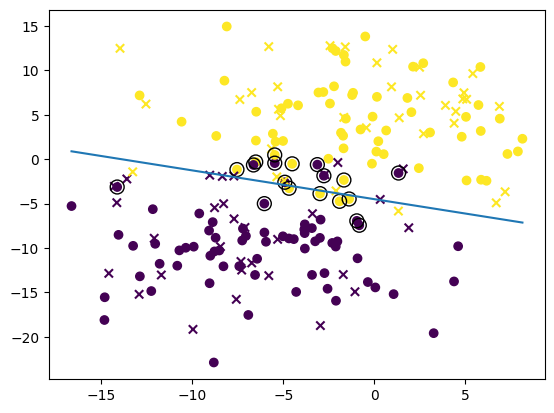

In [16]:
plt.scatter(
    x = blobs_features_train[:,0],
    y = blobs_features_train[:,1],
    c = blobs_label_train,
    label = "traint"
)
plt.scatter(
    x = blobs_features_test[:,0],
    y = blobs_features_test[:,1],
    c = blobs_label_test,
    marker = "x",
    label = "test"
)
plt.scatter(
    x = svm_linear.support_vectors_[:,0],
    y = svm_linear.support_vectors_[:,1],
    s=100,
    linewidth=1,
    facecolors='none',
    edgecolors='k'
)
plt.plot(
    decision_boundary_line_x,
    decision_boundary_line_y
)

In [17]:
# Funciones para mostrar los umbrales de SVM sobre nuestros datos

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

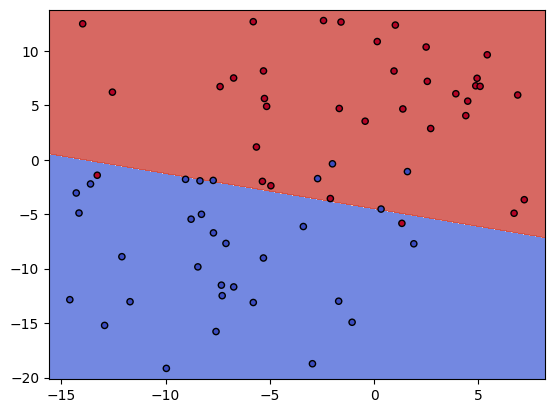

In [18]:
fig, ax = plt.subplots()
X0, X1 = blobs_features_test[:,0], blobs_features_test[:,1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm_linear, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=blobs_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

Generaremos otro conjunto de datos sintético que no es linealmente separable.

In [19]:
circles_features, circles_label = sklearn.datasets.make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=200, mean=(0,0), random_state = 12)

In [20]:
(
    circles_features_train,
    circles_features_test,
    circles_label_train,
    circles_label_test
) = sklearn.model_selection.train_test_split(
    circles_features,
    circles_label,
    test_size=0.33,
    random_state=11
)

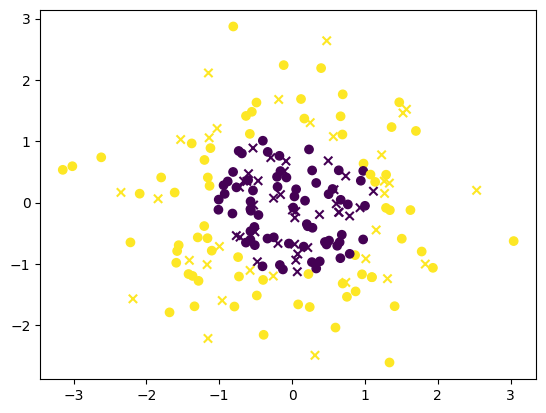

In [21]:
plt.scatter(
    x = circles_features_train[:,0],
    y = circles_features_train[:,1],
    c = circles_label_train,
    label = "train"
)
plt.scatter(
    x = circles_features_test[:,0],
    y = circles_features_test[:,1],
    c = circles_label_test,
    marker = "x",
    label = "test"
)

Si ajustamos un SVM con kernel lineal vemos que no funciona correctamente.

In [22]:
svm_linear_2 = sklearn.svm.SVC(kernel="linear")
svm_linear_2.fit(circles_features_train, circles_label_train)

SVC(kernel='linear')

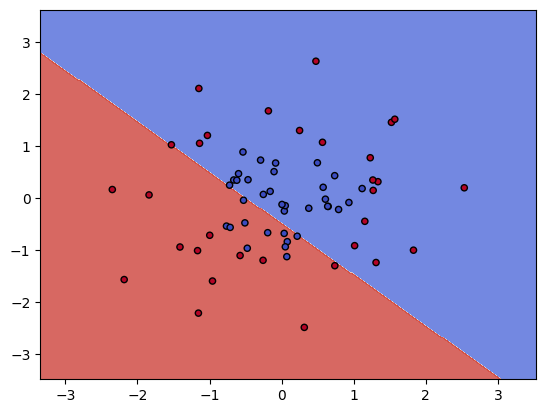

In [23]:
fig, ax = plt.subplots()
X0, X1 = circles_features_test[:,0], circles_features_test[:,1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm_linear_2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=circles_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

In [24]:
print(sklearn.metrics.classification_report(circles_label_test, svm_linear_2.predict(circles_features_test)))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        35
           1       0.52      0.39      0.44        31

    accuracy                           0.55        66
   macro avg       0.54      0.54      0.53        66
weighted avg       0.54      0.55      0.54        66



## Kernel Radial Base Function

Para poder transformar nuestro espacio en una tarea linealmente separable debemos generar una variable nueva que transforme nuestro espacio en una tarea linealmente separable.

En nuestro conjunto de datos, una buena variable extra que podemos construir es la distancia al centro.

In [25]:
distance_to_center_train = np.apply_along_axis(lambda x: scipy.spatial.distance.euclidean(x,[0,0]), 1, circles_features_train)
distance_to_center_train

array([0.669112  , 0.78403294, 0.73387031, 1.40731504, 0.50342035,
       1.55755523, 0.10635932, 0.85987943, 0.73689434, 1.70375148,
       0.18060842, 0.3258498 , 1.84316882, 2.12128294, 2.92829122,
       0.78286192, 0.46935441, 1.16521296, 0.57182574, 1.02942199,
       0.83123053, 0.86111509, 1.80919842, 2.20057727, 1.29741386,
       0.67565487, 2.31107419, 1.21654101, 1.16956126, 1.11667294,
       1.11397015, 1.70955951, 1.66052737, 2.72175215, 1.26224654,
       0.65172269, 1.54870237, 1.51171766, 1.38967534, 1.41308594,
       1.29228153, 2.20575783, 2.22939323, 1.36874634, 1.10558684,
       0.94868777, 1.35198048, 1.14960224, 2.15612859, 1.58862188,
       1.1890895 , 0.4403934 , 1.70376068, 1.63488484, 3.19258534,
       1.68887064, 1.00672735, 0.91730273, 0.83740273, 0.80316937,
       1.34790252, 1.8394262 , 1.057719  , 0.404081  , 0.53879141,
       1.14513319, 0.70670042, 1.09572776, 1.08618108, 0.93659084,
       1.83683582, 0.98219526, 0.82985212, 0.08161413, 1.68239

In [26]:
distance_to_center_test = np.apply_along_axis(lambda x: scipy.spatial.distance.euclidean(x,[0,0]), 1, circles_features_test)

In [27]:
circles_features_train_with_distances = np.hstack([circles_features_train, np.expand_dims(distance_to_center_train, axis = 1)])
circles_features_train_with_distances

array([[ 0.66750106,  0.04640264,  0.669112  ],
       [ 0.45088923, -0.64140982,  0.78403294],
       [ 0.1597877 , -0.71626359,  0.73387031],
       [-0.72880073, -1.20390412,  1.40731504],
       [-0.46139494, -0.20136227,  0.50342035],
       [ 0.6660776 ,  1.40794848,  1.55755523],
       [ 0.03250208,  0.10127152,  0.10635932],
       [ 0.68255535, -0.52298262,  0.85987943],
       [-0.57132789, -0.46540059,  0.73689434],
       [-0.48882101,  1.63212228,  1.70375148],
       [ 0.17774987,  0.03200602,  0.18060842],
       [-0.19932734,  0.25777259,  0.3258498 ],
       [-1.79682746,  0.41070962,  1.84316882],
       [ 0.59590861, -2.03586204,  2.12128294],
       [ 1.33749137, -2.60499641,  2.92829122],
       [-0.17331676,  0.76343571,  0.78286192],
       [-0.20630936,  0.42158037,  0.46935441],
       [-1.13246885,  0.274291  ,  1.16521296],
       [-0.53648126,  0.19792052,  0.57182574],
       [ 0.38011359, -0.95667303,  1.02942199],
       [-0.57181673, -0.60329911,  0.831

In [28]:
circles_features_test_with_distances = np.hstack([circles_features_test, np.expand_dims(distance_to_center_test, axis = 1)])

Asi se ve nuestro conjunto de datos con la variable construida.

In [29]:
px.scatter_3d(x = circles_features_train_with_distances[:,0],
           y = circles_features_train_with_distances[:,1],
           z = circles_features_train_with_distances[:,2],
              color = circles_label_train)


Si ajustamos el modelo sobre este conjunto de datos con la variable extra vemos que funciona mucho mejor.

In [30]:
svm_linear_3 = sklearn.svm.SVC(kernel="linear")
svm_linear_3.fit(circles_features_train_with_distances, circles_label_train)

SVC(kernel='linear')

In [31]:
print(sklearn.metrics.classification_report(circles_label_test, svm_linear_3.predict(circles_features_test_with_distances)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.90      0.95        31

    accuracy                           0.95        66
   macro avg       0.96      0.95      0.95        66
weighted avg       0.96      0.95      0.95        66



La generalización de esta idea es el kernel Radial Base Function, el cual es una función que depende de la distancia hacia un centro, que puede ser el origen o no.

In [32]:
rbf = sklearn.gaussian_process.kernels.RBF()

Generamos la característica sintética.

In [33]:
rbf_train = rbf(circles_features_train)[0]
rbf_train

array([1.00000000e+00, 7.71049021e-01, 6.57233243e-01, 1.72654494e-01,
       5.12785932e-01, 3.95776920e-01, 8.16182623e-01, 8.50259994e-01,
       4.07253332e-01, 1.45760014e-01, 8.86892280e-01, 6.71638948e-01,
       4.49224634e-02, 1.14123302e-01, 2.37683132e-02, 5.43049114e-01,
       6.36257773e-01, 1.92836540e-01, 4.78899005e-01, 5.80203615e-01,
       3.75682663e-01, 3.79803844e-01, 6.22453112e-02, 2.04509848e-01,
       1.54544507e-01, 4.94299650e-01, 1.22123895e-02, 6.53028353e-01,
       7.99770094e-01, 2.73279572e-01, 3.12449507e-01, 2.85462739e-01,
       1.97161506e-01, 3.54561489e-03, 2.57848959e-01, 4.49253525e-01,
       1.68681872e-01, 4.58446346e-01, 1.40861278e-01, 1.20906437e-01,
       8.17003963e-01, 2.42828513e-01, 9.62282275e-02, 7.57417232e-01,
       8.53088702e-01, 2.87213190e-01, 1.48063255e-01, 6.73335523e-01,
       2.95772811e-02, 1.52740037e-01, 8.57133903e-01, 8.22697095e-01,
       6.41668340e-02, 4.12365687e-01, 6.13562658e-04, 3.21398754e-01,
      

Visualizamos cómo se ve el conjunto de datos.

In [34]:
px.scatter_3d(x = circles_features_train[:,0],
           y = circles_features_train[:,1],
           z = rbf_train,
              color = circles_label_train)


Podemos instanciar un modelo que implemente directamente el kernel RBF.

In [35]:
svm_rbf = sklearn.svm.SVC(kernel="rbf")
svm_rbf.fit(circles_features_train, circles_label_train)

SVC()

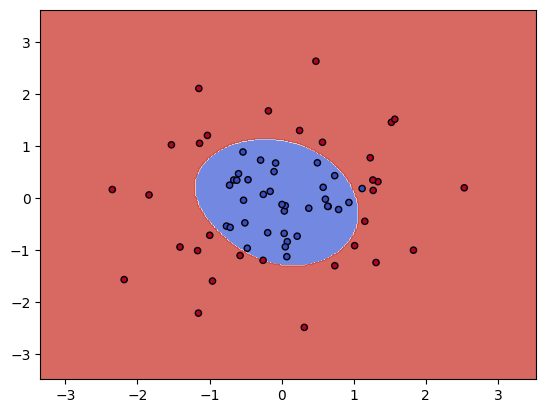

In [36]:
fig, ax = plt.subplots()
X0, X1 = circles_features_test[:,0], circles_features_test[:,1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm_rbf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=circles_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()